In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import scipy
from scipy.stats import zscore


In [ ]:
df1 = pd.read_csv("e:/2025/ExtensoData_Internship_Work/Projects/Task_3_EDA/data/cleaned_transactions.csv")
print(df1.info())

# changing datetime columun to datetime format
df1['transactionDateTime'] = pd.to_datetime(df1['transactionDateTime'])
df1["accountOpenDate"] = pd.to_datetime(df1["accountOpenDate"])
df1['currentExpDate'] = pd.to_datetime(df1['currentExpDate'])
df1['dateOfLastAddressChange'] = pd.to_datetime(df1['dateOfLastAddressChange'])
df1['transactionDateTime'].dtype
print(df1.info())


## Summary Statistics for Numeric Columns

1. What are the min, max, mean, median, and standard deviation of:
    - transactionAmount
    - availableMoney
    - creditLimit
    - currentBalance

2. Are there outliers or unusually high/low values

In [ ]:
# Question 1 
df1[['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']].describe()

# df1.shape


In [ ]:
df1[['creditLimit','availableMoney','transactionAmount','currentBalance']].hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()


Insights gained
1. Based on Std
    - creditLimit : High variation. Some customers have very small limits (250) while others go up to 50000.
    - availableMoney : Wide spread, including negative balances. Suggest different usuage patterns- some maxing out cards, others preserving credit.
    - transactionAmount: Most people spend small amounts , but a few spend a lot in on ego (1825). So the spending pattern is not the same for everyone.
    - currentBalance : Again, wide variablility. Some accounts carry very low(0) while some have very high balances (47496.5)

2. Based on other statistics
    - Most customers have credit limits below 7500, with 75% under 15000. While few premium accounts with 50,000 credit limits.
    - Some accounts appear to be overdrawn (negative values), while 75% have available money below 8000
    - 75% of transactions are below 189 and likely to be everyday purchases. Some with high value like 1825 in one go.
    - Some have large current balance (47,497) while some have zero balance, average is 4,044.

2. Are there outliers or unusually high/low values ?

In [ ]:
#visualzing outliers

# Boxplot for all four columns
cols = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']
for col in cols:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=df1[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

## Exploring Categorical Columns

3. What are the unique values in:
    - merchantCategoryCode
    - transactionType
    - acqCountry
    - merchantCountryCode
    - merchantName
4. What are the most frequet values in those columns?
5. What are the most common merchants and merchant categories by transaction count and amount?
6. How does transaction frequency and amount vary by country, state, or city?

In [ ]:
# unique method for seeing the list of unique values
print("merchantCategoryCode: ", df1['merchantCategoryCode'].unique())
print()
print("transactionType", df1['transactionType'].unique())
print()
print("acqCountry", df1['acqCountry'].unique())
print()
print("merchantName", df1['merchantName'].unique())
print()
print("merchantCountryCode", df1['merchantCountryCode'].unique())
print()
print("posEntryMode",df1['posEntryMode'].unique())
print()
print("posConditionCode", df1['posConditionCode'].unique()) 


# nunique method for count value of unique values
# Print number of unique values for each
print("merchantCategoryCode:", df1['merchantCategoryCode'].nunique())
print("transactionType:", df1['transactionType'].nunique())
print("acqCountry:", df1['acqCountry'].nunique())
print("merchantCountryCode:", df1['merchantCountryCode'].nunique())
print("merchantName:", df1['merchantName'].nunique())
print('posEntryMode',df1['posEntryMode'].nunique())
print('posConditionCode',df1['posConditionCode'].nunique())

      


Most Frequent (Mode) Values in These Columns

In [ ]:
print("Most frequent merchantCategoryCode:\n", df1['merchantCategoryCode'].value_counts().head())
print("Most frequent transactionType:\n", df1['transactionType'].value_counts().head())
print("Most frequent acqCountry:\n", df1['acqCountry'].value_counts().head())
print("Most frequent merchantCountryCode:\n", df1['merchantCountryCode'].value_counts().head())
print("Most frequent merchantName:\n", df1['merchantName'].value_counts().head())


Most Common Merchants & Merchant Categories by Transaction Count and Amount

In [ ]:
# By transaction count
top_merchants_by_count = df1.groupby('merchantName').size().sort_values(ascending=False).head()
top_categories_by_count = df1.groupby('merchantCategoryCode').size().sort_values(ascending=False).head()

# By transaction amount
top_merchants_by_amount = df1.groupby('merchantName')['transactionAmount'].sum().sort_values(ascending=False).head()
top_categories_by_amount = df1.groupby('merchantCategoryCode')['transactionAmount'].sum().sort_values(ascending=False).head()

print("Top merchants by transaction count:\n", top_merchants_by_count)
print()
print("Top categories by transaction count:\n", top_categories_by_count)
print()
print("Top merchants by transaction amount:\n", top_merchants_by_amount)
print()
print("Top categories by transaction amount:\n", top_categories_by_amount)


Transaction Frequency and Amount by Country, State, or City

In [ ]:
# Frequency and amount by country
country_summary = df1.groupby('acqCountry').agg({
    'transactionAmount': ['count', 'sum', 'mean']
}).sort_values(('transactionAmount', 'count'), ascending=False)


print("Transaction summary by country:\n", country_summary.head())


## Understanding variable (isFraud)

7. How many transactions are marked as fraud vs not fraud?
8. What is the percentage of fradulent transactions?
9. In which merchantName and merchant Category fraudulent transactions occur most?
10. In which country fraudulent transactions occur most?


In [ ]:
#sorting by trasnaction time
sorted_df = df1.sort_values(by='transactionDateTime', ascending=False)

print(sorted_df.shape)

# print(sorted_df.head())

#fraud_transactions = sorted_df[sorted_df['isFraud']].value_counts() # this gives dataframe rows
fraud_transactions = sorted_df['isFraud'].value_counts()
print(fraud_transactions)

#percentage of fradulent transactions:
percentage_of_fraud = (fraud_transactions[1]/(fraud_transactions[0]+fraud_transactions[1]))*100
print(percentage_of_fraud)




In [ ]:
fraud_df = df1[df1['isFraud']==True]

#Most common merchant names in frauds
top_merchants_by_fraud = fraud_df['merchantName'].value_counts().head()

top_merchantsCategories_by_fraud = fraud_df['merchantCategoryCode'].value_counts().head()

print("Top merchants in fraudulent transactions:\n", top_merchants_by_fraud)
print("Top merchant categories in fraudulent transactions: \n", top_merchantsCategories_by_fraud)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 5 fraudulent merchants
sns.barplot(x=top_merchants_by_fraud.values, y=top_merchants_by_fraud.index, hue=top_merchants_by_fraud.index,palette='Reds_r')
plt.title("Top 5 Fraudulent Merchant Names")
plt.xlabel("Number of Fraudulent Transactions")
plt.ylabel("Merchant Name")
plt.show()

# Top 5 fraudulent merchant categories
sns.barplot(x=top_merchantsCategories_by_fraud.values, y=top_merchantsCategories_by_fraud.index, hue=top_merchantsCategories_by_fraud, palette='Reds_r')
plt.title("Top 5 Fraudulent Merchant Categories")
plt.xlabel("Number of Fraudulent Transactions")
plt.ylabel("Merchant Category")
plt.show()


In [ ]:
# Most frequent countries for fraud
fraud_by_country = fraud_df['acqCountry'].value_counts().head()

print("Countries with most fraudulent transactions:\n", fraud_by_country)


## Account and Transactions

11. How many unique customers are there, and how many accounts per customer?
8. Which customers have the highest number of transactions?
9. What is total number of transactions?
10. Calculate fraudlent transaction frequency for each account
11. What is total number of fraudulent transactions?
12. Do certain customers/accounts have a higher rate of fradulent transactions?
13. What is overall fraud rate ?
14. Is there a difference in spending behavior between fraudulent and non-fraudulent transactions?
15. What is the highest transaction amount?
    What is the distribution of transactionAmount? Are there any outliers?
    What is the overall transaction amount and top accounts by that?
16. Available Amount vs isFraud
17. currentBalance vs isFraud

11. How many unique customers are there, and how many accounts per customer?


In [ ]:
#Unique customer and accounts count
# unique_customers= df1['customerId'].unique()
# print(f"Unique customers count: {len(unique_customers)}")
#output: 5000

unique_accounts = df1['accountNumber'].unique()
print(f"unique_accounts count: {len(unique_accounts)}")
#output: 5000

#(df1['customerId'] == df1['accountNumber']).all()
#checked row by row if both are same and found true

#df1 = df1.drop('customerId', axis=1)
#dropped the customerID column
df1.info()


12. Which customers have the highest number of transactions?
9. What is total number of transactions?

In [ ]:


# This counts all rows per account, including those with transactionAmount == 0
total_transactions_frequency = sorted_df.groupby('accountNumber').size().reset_index(name='transaction_count')
print("Total Transactions Frequency:")
print(total_transactions_frequency)

print("Top 10 Highest transaction count and account number")
print(total_transactions_frequency.sort_values(by='transaction_count', ascending=False).head(10).reset_index(drop=True))

print(f"\n🔢 Total number of transactions across all accounts: {total_transactions_frequency['transaction_count'].sum()}")



AccountNumber : 318001076 does highest number of transaction in year 2016 i.e. 10,034

14. Calculate fraudlent transaction frequency for each account
10. What is total number of fraudulent transactions?



In [ ]:

# Fraud transactions frequency
fraud_transactions_frequency = (
    sorted_df.groupby("accountNumber")['isFraud']
    .sum()
    .reset_index()
    .rename(columns={'isFraud': 'fraud_count'})
)
print(fraud_transactions_frequency)

# Now sort the DataFrame by the newly named column
print("Top 10 Highest fraudulent transaction count and account number")
print(fraud_transactions_frequency.sort_values(by='fraud_count', ascending=False).head(10).reset_index(drop=True))

print(f"🚨 Total number of fraudulent transactions across all accounts: {fraud_transactions_frequency['fraud_count'].sum()}")

sorted_df.info()
fraud_transactions_frequency.info()



16. What is fraud rate per account?
12. Do certain customers/accounts have a higher rate of fradulent transactions?
13. What is overall fraud rate ?

In [ ]:
# Merge the two DataFrames on 'accountNumber'
merged_data = pd.merge(total_transactions_frequency, fraud_transactions_frequency, on='accountNumber', how='left')

# Calculate the percentage of fraudulent transactions per account
merged_data['fraud_percentage'] = (merged_data['fraud_count'] / merged_data['transaction_count']) * 100

# Handling missing fraud counts: Replace NaN with 0 (if an account has no fraud)
merged_data['fraud_percentage'] = merged_data['fraud_percentage'].fillna(0)

# Print the percentage of fraudulent transactions for the top 10 accounts, along with accountNumber
print("Top 10 Accounts with highest fraud percentage and their fraud percentage")
print(merged_data[['accountNumber', 'fraud_percentage']].sort_values(by='fraud_percentage', ascending=False).head(10).reset_index(drop=True))

# ✅ Total number of transactions in the entire dataset
total_transactions = total_transactions_frequency['transaction_count'].sum()

# ✅ Total number of fraudulent transactions
fraud_transactions_frequency['fraud_count'] = fraud_transactions_frequency['fraud_count'].fillna(0)
total_fraud_transactions = fraud_transactions_frequency['fraud_count'].sum()
print(f"🚨 Total number of fraudulent transactions across all accounts: {int(total_fraud_transactions)}")

overall_fraud_rate = (total_fraud_transactions / total_transactions) * 100
print(f"⚠️ Overall fraud rate in the dataset: {overall_fraud_rate:.2f}%")

print(merged_data.info())



19. Is there a difference in spending behavior between fraudulent and non-fraudulent transactions?

In [ ]:
summary_stats = sorted_df.groupby('isFraud')['transactionAmount'].describe()
print(summary_stats)


In [ ]:
plt.figure(figsize=(7, 6))
sns.boxplot(data=sorted_df, x='isFraud', y='transactionAmount', hue='isFraud', palette={False: 'green', True: 'red'}, legend=False)
plt.xlabel('Fraudulent Transaction?')
plt.ylabel('Transaction Amount')
plt.title('Comparison of Spending: Fraud vs Non-Fraud Transactions')
plt.tight_layout()
plt.show()


Insights
1. Highest number of transaction is 10,034 by account number 318001076.
2. Highest number of fraudulent transaction is 302 by account number 311710839.
3. Fraud_percentage is 100% for account 981286839 , and 50% for account 638423733.
4. Total number of transactions acroll all accounts: 641914
5. Total number of fraudulent transactions across all accounts: 11302
6. Overall fraud rate is 1.76%.

More on comparing fraudulent and non fraudulent transactions
1. Fraudulent transactions are, on average, higher in value. (Based on mean)
2. Fraudulent transactions also have greater variability - not only are they larger on average, but also more unpredictable. (Based on SD)
3. Median for frauds is more than double that of non-frauds. Median is more resistant to outliers, so this confirms fraud transactions are genuinely higher, not just due to a few big outliers.
4. 75% of non-fraud transactions are under 186.44 but 75% of frauds go up to 324.82.
5. The maximum transaction values are comparable - large outliers happend in both categories.

How many transaction are done by the accountNumber 981286839 and other top accounts with highest fraud percentage in the year 2016.

In [ ]:
merged_data.info()

merged_data.sort_values(by='fraud_percentage',ascending=False).head(10).reset_index(drop=True)

20. What is the highest transaction amount?
What is the distribution of transactionAmount? Are there any outliers?
What is the overall transaction amount and top accounts by that?

In [ ]:
print("Highest transaction amount is :")
print(sorted_df['transactionAmount'].max())
print("Lowest transaction amount is: ")
print(sorted_df['transactionAmount'].min())

In [ ]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.histplot(data=sorted_df, x='transactionAmount', bins=40, kde=True, color='skyblue')

# Format x-axis with commas
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Set x-axis limits and tick intervals
plt.xlim(0, 2500)
plt.xticks(range(0, 2501, 300))  # Set ticks every 100 units

plt.xlabel('Transaction Amount')
plt.ylabel('Frequency of that Transaction amount')
plt.title('Distribution of Transaction Amounts (Focused Range)')
plt.tight_layout()
plt.show()


In [ ]:
# merged_data.drop(columns='transaction_amount_overall', inplace=True)

# merged_data.info()

# Remove old column first if it exists
if 'transaction_amount_overall' in merged_data.columns:
    merged_data.drop(columns='transaction_amount_overall', inplace=True)

# Calculate transaction amount per account
transaction_amount_overall = sorted_df.groupby('accountNumber')['transactionAmount'].sum().reset_index()

# Rename before merging to avoid conflict
transaction_amount_overall.rename(columns={'transactionAmount': 'transaction_amount_overall'}, inplace=True)

# Merge cleanly
merged_data = pd.merge(merged_data, transaction_amount_overall, on='accountNumber', how='left')

top_accounts = merged_data.sort_values(by='transaction_amount_overall', ascending=False).head(10).reset_index(drop=True)
print(top_accounts[['accountNumber', 'transaction_amount_overall']])


min_accounts = merged_data.sort_values(by='transaction_amount_overall', ascending=True).head(10).reset_index(drop=True)
print(min_accounts[["accountNumber", "transaction_amount_overall"]])

merged_data.describe()

The highest transaction amount in one go is 1825.25 rupees.

Account with overall highest transaction about over the year is AccountNumber 318001076 with amount 14,57,470.51.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(10, 6))

# Filter for realistic range (e.g., 0 to 15,000)
sns.histplot(data=merged_data, x='transaction_amount_overall', bins=30, kde=True, color='skyblue')

# Format x-axis with commas
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Set x-axis limits based on your actual data range
plt.xlim(0, 1500000)  # You can adjust the upper limit if needed

plt.xlabel('Total Transaction Amount per Account')
plt.ylabel('Number of Accounts')
plt.title('Distribution of Transaction Amounts (Focused Range)')
plt.tight_layout()
plt.show()

sorted_df.columns


21. availableMoney vs isFraud

In [ ]:

print(sorted_df['availableMoney'].max())

print(sorted_df['availableMoney'].min())


# Define balance bins
bins = [-1500, 0, 5000, 10000, 15000, 20000, 30000, 40000, 50000]

labels = [f'{bins[i]}–{bins[i+1]}' for i in range(len(bins)-1)]

# Group data without creating a new column
binned = pd.cut(sorted_df['availableMoney'], bins=bins, labels=labels, include_lowest=True)
grouped = sorted_df.groupby(binned, observed=True)['isFraud'].agg(total='count', fraud='sum')
grouped['fraud_rate'] = (grouped['fraud'] / grouped['total']) * 100

print(grouped)

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))
grouped['total'].plot(kind='bar', color='lightblue', ax=ax1)
ax1.set_ylabel('Transaction Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Available Money Range')
ax1.set_title('Fraud Rate and Transaction Volume by Available Money')
ax1.set_xticklabels(labels, rotation=45)

# Add fraud rate as line
ax2 = ax1.twinx()
grouped['fraud_rate'].plot(kind='line', color='red', marker='o', ax=ax2)
ax2.set_ylabel('Fraud Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.tight_layout()
plt.show()

22. currentBalance vs isFraud

In [ ]:

print(sorted_df['currentBalance'].max())

print(sorted_df['currentBalance'].min())


# Define balance bins
bins = range(0, 50000, 5000)
labels = [f'{bins[i]}–{bins[i+1]}' for i in range(len(bins)-1)]

# Group data without creating a new column
binned = pd.cut(sorted_df['currentBalance'], bins=bins, labels=labels, include_lowest=True)
grouped = sorted_df.groupby(binned, observed=True)['isFraud'].agg(total='count', fraud='sum')
grouped['fraud_rate'] = (grouped['fraud'] / grouped['total']) * 100

print(grouped)

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))
grouped['total'].plot(kind='bar', color='lightblue', ax=ax1)
ax1.set_ylabel('Transaction Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Current Balance Range')
ax1.set_title('Fraud Rate and Transaction Volume by Current Balance')
ax1.set_xticklabels(labels, rotation=45)

# Add fraud rate as line
ax2 = ax1.twinx()
grouped['fraud_rate'].plot(kind='line', color='red', marker='o', ax=ax2)
ax2.set_ylabel('Fraud Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.tight_layout()
plt.show()

## Customer, CVV, expirationDate

23. Normally after how long time of opening account the address is changed?
24. From today's date it we see which are the oldest and newest accounts
25. In which day maximum accounts are opened?
26. Check enteredCVV and cardCVV mismatches, and calculate percentage of mismatch
27. cardPresent = False vs Fraud
28. cardPresent = True case vs Fraud
29. Are card-present vs card-absent entry modes associated with different transaction amounts?
30. CVV mismtach and isFraud comparison using cross tab
31. expirationDateKeyInMatch and isFraud comparison



In [ ]:
# List of columns related to customer information
customer_columns = [
    'accountNumber',
    'customerId',
    'creditLimit',
    'availableMoney',
    'cardCVV',
    'enteredCVV',
    'cardLast4Digits',
    'currentExpDate',
    'accountOpenDate',
    'dateOfLastAddressChange',
    'currentBalance',
    'expirationDateKeyInMatch',
    'cardPresent'
]

# # # Create the customer DataFrame
# customer_df = df1[customer_columns].drop_duplicates(subset='accountNumber').reset_index(drop=True)

customer_df = df1.sort_values(by='transactionDateTime', ascending=False) \
                 .drop_duplicates(subset='accountNumber') \
                 .reset_index(drop=True)


print(customer_df[['availableMoney', 'creditLimit', 'currentBalance']].describe())

# # Preview the DataFrame
# print("Customer DataFrame:")
# print(customer_df.head())

# print(
#     customer_df[['accountNumber', 'currentBalance']]       # Select only these two columns
#     .sort_values(by='currentBalance', ascending=False)     # Sort by currentBalance (highest first)
#     .reset_index(drop=True)                                # Reset index after sorting (drop old index)
#     .head()                                                # Show top 5 rows
# )

# # print(df1.info())

print(df1[['availableMoney', 'creditLimit', 'currentBalance', 'transactionAmount']].describe())
print(customer_df[['accountNumber','currentBalance']].sort_values(by='currentBalance',ascending=False).head().reset_index(drop=True))


23. Normally after how long time of opening account the address is changed?

In [ ]:
customer_df['add_change_gap'] = (customer_df['dateOfLastAddressChange']- customer_df['accountOpenDate']).dt.days
print(customer_df[['accountNumber','add_change_gap']].sort_values(by='add_change_gap', ascending=False).reset_index(drop=True).head(10))

average_gap = customer_df['add_change_gap'].mean()
print(f"\nOverall average address change gap (in days): {average_gap: .2f}")

print("After opening account how many customer have changed the address")
changed_after_opening = customer_df[customer_df['add_change_gap']>0]

print(f"\nNumber of customers who changed the address after opening account: {changed_after_opening.shape[0]} ")
print(changed_after_opening[['accountNumber','add_change_gap']].sort_values(by='add_change_gap',ascending=True).reset_index(drop=True))

24. From today's date it we see which are the oldest and newest accounts

In [ ]:
#customer_df = customer_df.drop(columns=['accountAge'])
today = pd.Timestamp.today()
customer_df['accountAge'] = (today - customer_df['accountOpenDate']).dt.days

print("\nTop 5 oldest accounts:")
print(customer_df[['accountNumber','accountOpenDate','accountAge']]
      .sort_values(by='accountAge', ascending=False)
      .reset_index(drop=True)
      .head())

print("\nTop 5 new accounts")
print(customer_df[['accountNumber','accountOpenDate','accountAge']]
      .sort_values(by='accountAge',ascending=True)
      .reset_index(drop=True)
      .head())

#Oldest account
oldest_account = customer_df.loc[customer_df['accountAge'].idxmax()]
print(f"\n The oldest account is:\nAccount Number: {oldest_account['accountNumber']},"
      f"Opened on: {oldest_account['accountOpenDate'].date()} ,"
      f" Age: {oldest_account['accountAge']} days ")

#finding the newest account

newest_account = customer_df.loc[customer_df['accountAge'].idxmin()]

print(f"\n The newest account is:\nAccount Number: {newest_account['accountNumber']},"
      f"Opened on: {newest_account['accountOpenDate'].date()} ,"
      f" Age: {newest_account['accountAge']} days ")

25. In which day maximum accounts are opened?

In [ ]:
account_open_day_counts = customer_df.groupby('accountOpenDate').size()

max_open_day = account_open_day_counts.idxmax()
max_open_count = account_open_day_counts.max()

print("\n Top 5 days with most account openings:")
print(account_open_day_counts.sort_values(ascending=False).head())

print(f"The maximum number of accounts were opened on {max_open_day.date()},with {max_open_count} accounts.")

print("Average count of accounts opened in a day:", account_open_day_counts.mean())
print("Minimum count of acounts opened in a day:", account_open_day_counts.min())

26. Check mismatches between entered CVV and actual CVV and calculate mismatch_percentage



In [ ]:
# Step 1: Create a new column to mark mismatches between entered and actual CVV
sorted_df['cvv_mismatch'] = sorted_df['enteredCVV'] != sorted_df['cardCVV']

print("Account Number and corresponding: cvv_mismatch counts")
print(sorted_df.groupby('accountNumber')['cvv_mismatch'].sum().sort_values(ascending=False))

# Step 2: Group by account and calculate total transactions and mismatches
fraudulent_df = sorted_df.groupby('accountNumber').agg(
    total_transactions=('cvv_mismatch', 'count'),
    mismatch_count=('cvv_mismatch', 'sum')
).reset_index()

# Step 3: Calculate percentage of mismatches
fraudulent_df['mismatch_percentage'] = (fraudulent_df['mismatch_count'] / fraudulent_df['total_transactions']) * 100



#fradulent_df only contains those accounts whose cvv mismatch_percentage is greater than 0

fraudulent_df = fraudulent_df[fraudulent_df['mismatch_percentage']>0]

print(fraudulent_df.sort_values(by='mismatch_percentage',ascending=False).head(10).reset_index(drop=True))

# Filter accounts with more than 10% mismatch, then sort by mismatch percentage
print(fraudulent_df[fraudulent_df['mismatch_percentage'] > 10].sort_values(by='mismatch_percentage', ascending=False).head(40).reset_index(drop=True))








We checked for enteredCVV and  cardCVV mismatch, first we counted the total transactions number and then mismatch count for each account number and then grouped those accounts whose mismatch_percentage is greater than 0 in a dataframe fradulent_df.

In fradulent_df one account with 95.65% mismatch rate, similary 39 accounts with mismatch rate above 10%.



27. Now check cardpresent = False case vs Fraud

In [ ]:
# Step 1: Check distinct values in 'cardPresent' column
print(sorted_df['cardPresent'].unique())
print(sorted_df['cardPresent'].value_counts(dropna=False))

# Step 2: Filter data for card-absent transactions
card_absent_df = sorted_df[sorted_df['cardPresent'] == False]

# Step 3: Group and compute mismatch stats for card-absent transactions
fraudulent_card_absent_df = card_absent_df.groupby('accountNumber').agg(
    total_transactions_card_absent=('cvv_mismatch', 'count'),
    cvv_mismatch_count_card_absent=('cvv_mismatch', 'sum')
).reset_index()

# Step 4: Calculate mismatch percentage
fraudulent_card_absent_df['cvv_mismatch_percentage_card_absent'] = (
    fraudulent_card_absent_df['cvv_mismatch_count_card_absent'] / fraudulent_card_absent_df['total_transactions_card_absent']
) * 100


total_mismatches_while_card_absent = card_absent_df['cvv_mismatch'].sum()
print("Total CVV mismatches (card absent):", total_mismatches_while_card_absent)

# Step 6: Calculate totals
total_transactions = fraudulent_card_absent_df['total_transactions_card_absent'].sum()
total_mismatches = fraudulent_card_absent_df['cvv_mismatch_count_card_absent'].sum()

# Step 7: Calculate overall percentage
overall_mismatch_percentage = (total_mismatches / total_transactions) * 100

# Step 8: Create a summary row as a DataFrame
summary_row = pd.DataFrame({
    'accountNumber': ['TOTAL'],
    'total_transactions_card_absent': [total_transactions],
    'cvv_mismatch_count_card_absent': [total_mismatches],
    'cvv_mismatch_percentage_card_absent': [overall_mismatch_percentage]
})

# Step 9: Append the summary row to the original DataFrame
fraudulent_card_absent_df = pd.concat([fraudulent_card_absent_df, summary_row], ignore_index=True)

# # Step 10: Print the final DataFrame
# print(fraudulent_df1)

# print("Top 20 accounts with card absent and high cvv mismatch rate")
# print(fraudulent_df1.sort_values(by='cvv_mismatch_percentage_card_absent', ascending=False).head(20).reset_index(drop=True))

print("Creating fraudulent_df2 to store data for cvv_mismatch_percentage_card_absent greater than 10%")

fraudulent_card_absent_df1 = fraudulent_card_absent_df[fraudulent_card_absent_df['cvv_mismatch_percentage_card_absent']>10]
print(fraudulent_card_absent_df1.sort_values(by='cvv_mismatch_percentage_card_absent',ascending=False).reset_index(drop=True))


1. Total transaction with card not present( card absent) are: 340453
2. Total trasnaction with card absent and cvvMismatch are: 3120
3. For this case cvv_mismatch_percentage_card_present > 10 are kept in dataframe: fraudulent_card_absent_df1
4. There are accounts with 100% mismatch percentage (238223440 - 9/9), (443926651 - 1/1)

28. cardPresent = True case vs Fraud

In [ ]:
# Step 1: Filter data for card-present transactions
card_present_df = sorted_df[sorted_df['cardPresent'] == True]

# Step 2: Group and compute CVV mismatch stats for card-present transactions
fraudulent_card_present_df = card_present_df.groupby('accountNumber').agg(
    total_transactions_card_present=('cvv_mismatch', 'count'),
    cvv_mismatch_count_card_present=('cvv_mismatch', 'sum')
).reset_index()

# Step 3: Calculate mismatch percentage
fraudulent_card_present_df['cvv_mismatch_percentage_card_present'] = (
    fraudulent_card_present_df['cvv_mismatch_count_card_present'] / fraudulent_card_present_df['total_transactions_card_present']
) * 100

# Step 4: Add summary row (totals)
summary_row_present = pd.DataFrame({
    'accountNumber': ['TOTAL'],
    'total_transactions_card_present': [fraudulent_card_present_df['total_transactions_card_present'].sum()],
    'cvv_mismatch_count_card_present': [fraudulent_card_present_df['cvv_mismatch_count_card_present'].sum()],
    'cvv_mismatch_percentage_card_present': [
        (fraudulent_card_present_df['cvv_mismatch_count_card_present'].sum() / 
         fraudulent_card_present_df['total_transactions_card_present'].sum()) * 100
    ]
})

fraudulent_card_present_df = pd.concat([fraudulent_card_present_df, summary_row_present], ignore_index=True)
print(fraudulent_card_present_df)

# Step 5: Filter accounts with >10% mismatch
fraudulent_card_present_df1 = fraudulent_card_present_df[
    fraudulent_card_present_df['cvv_mismatch_percentage_card_present'] > 10
]

# Display results
print(fraudulent_card_present_df1.sort_values(by='cvv_mismatch_percentage_card_present', ascending=False).reset_index(drop=True).head(10))


1. Total transaction with card present are: 301461
2. Total trasnaction with card present and cvvMismatch are: 2817
3. For this case cvv_mismatch_percentage_card_present > 10 are kept in dataframe: fraudulent_card_present_df1
4. There are accounts with 100% mismatch percentage (140105230 - 11/11), (380948187 - 1/1), (386190390 - 1/1)




29. Are card-present vs card-absent entry modes associated with different transaction amounts?

In [ ]:
entry_mode_stats = sorted_df.groupby('cardPresent')['transactionAmount'].describe()
entry_mode_stats.rename(index={True: 'Card Present', False: 'Card Absent'}, inplace=True)
print(entry_mode_stats)

Insights:
1. Card-Present transactions tend to have a slightly higher average ( 141.93 vs 129.17) and median amount. This may reflect more in-store purchases.
2. CV = SD/mean * 100 , A CV of 0 indicates no variability, all data points are identitcal. ( 0 -10 : Low variability, data points are tightly clustered around mean, 10-30 : Moderate variability, 30 -100 : high variability, >100: very high variability). Here both SDs are similar, both are of high variabililty slightly card absent is more.
3. Card absent is more frequent entry mode ( 340k). Could indicate increasing reliance on e-commerce or card-not-present purchases.

In [ ]:
print(pd.crosstab(sorted_df['cardPresent'], sorted_df['isFraud'], margins=True, margins_name= "Total"))

cardPresent = False i.e card Absent cases have 6624 fraud
cardPresent = True i.e. card present cases have 4678 fraud

In [ ]:
# Create a pivot table for fraud vs card-present
fraud_pivot = sorted_df.pivot_table(index='cardPresent', columns='isFraud', aggfunc='size', fill_value=0)

# Plot a stacked bar chart
fraud_pivot.plot(kind='bar', stacked=True, figsize=(8,6), color=['green', 'red'])
plt.title('Fraud vs Card Present/Absent Transactions')
plt.xlabel('Card Present (True = Yes, False = No)')
plt.ylabel('Count of Transactions')
plt.xticks([0, 1], ['Card Present', 'Card Absent'], rotation=0)
plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'])
plt.show()


30. CVV Mismatch and isFraud Comparison

In [ ]:
sorted_df.shape
sorted_df.columns
fraud_crosstab = pd.crosstab(
    sorted_df['cvv_mismatch'],
    sorted_df['isFraud'],
    rownames=['CVV Mismatch'],
    colnames=['Is Fraud'],
    margins=True  # adds totals for rows and columns
)

print(fraud_crosstab)


Most transactions (635,977 out of 641,914) did not have a CVV mismatch.

CVV mismatch occurred in only ~0.92% of transactions (5937 / 641914).

Fraud rate when CVV matched:

11,107 / 635,977 ≈ 1.75%

Fraud rate when CVV mismatched:

195 / 5,937 ≈ 3.28%



In [ ]:
cvv_mismatch_pivot = sorted_df.pivot_table(index='cvv_mismatch', columns='isFraud', aggfunc='size', fill_value=0)

#plot stacked bar chart
cvv_mismatch_pivot.plot(kind='bar', stacked=True, figsize=(8,6), color = ['green','red'])
plt.title('Fraud vs CVV Match/Mismatch transactions')
plt.xlabel('CVV Mismatch (True = Yes, False = No)')
plt.ylabel('Count of Transactions')
plt.xticks([0,1],['CVV match', 'CVV_mismatch'], rotation=0)
plt.legend(title='Fraud', labels =['Non Fraud', 'Fraud'])
plt.show()

# sorted_df.columns
print(sorted_df['cvv_mismatch'].value_counts())

31. expirationDateKeyInMatch and isFraud comparison

In [ ]:

print(sorted_df['expirationDateKeyInMatch'].unique())

sorted_df["expirationDateKeyInMatch"].value_counts()
expiration_fraud_crosstab_percent = pd.crosstab(
    sorted_df['expirationDateKeyInMatch'],
    sorted_df['isFraud'],
    rownames=['expiration_Mismtach'],
    colnames=['Is Fraud'],
    margins=True  # adds totals for rows and columns
)

print(expiration_fraud_crosstab_percent)

Observations:
1. Only 969 transactions had an expiration date mismatch — a very small fraction (~0.15%) of total transactions.
2. Fraud rate when expiration matched: 11289/640945 =  approx. 1.76%
3. Fraud rate when expiration mismatched: 13/969 = approx. 1.34%


❗ Insight:
Surprisingly, the fraud rate is slightly lower when expiration mismatches occur (1.34%) than when they match (1.76%).

This suggests that expiration date mismatches are not a strong indicator of fraud in dataset


## posEntryMode and posConditionCode Information

32. What are the most frequent POS entry modes?
33. Is fraud more common in any particular entry mode?
34. What are the most common POS condition codes?
35. How different condition codes relate to fraud?
36. Are some condition codes tried to specific merchant categories or regions?

32. What are the most frequent POS entry modes?

In [ ]:
sorted_df['posEntryMode'].value_counts()

Most frequent POS Entry Modes are 5 (chip read), 9(Manual entry), and 2 (Magnetic Strip swipe).

33. Is fraud more common in any particular entry mode?

In [ ]:
fraud_by_entry = (sorted_df.groupby('posEntryMode')['isFraud'].mean()*100).sort_values(ascending = False)
print(fraud_by_entry)

Yes, Fraud rate is more common in Manual Entry(9) 2.7% and Advanced methods (QR, bluetooth , wallets ->90) 2.01 %.

34. What are the most common POS condition codes?

In [ ]:
sorted_df['posConditionCode'].value_counts()

Customer present (Chip read or magnetic swipe can be used) is most common POS condition followed by Mail/Phone/Online Order (card-not-present).


35. How different condition codes relate to fraud?

In [ ]:
fraud_by_condition = (sorted_df.groupby('posConditionCode')['isFraud'].mean()*100).sort_values(ascending = False)
print(fraud_by_condition)

99.0	Unknown or other — This might be used when the system can’t determine the condition of the transaction. This could also represent some fraudulent or suspicious activity or any conditions that don’t fit into the usual categories.

Approx 3.68 percentage of fraudulent in posConditionCode 99, followed by approx. 1.82 in posConditionCode 1 and at last for 8.

36. Are some condition codes tried to specific merchant categories or regions?

In [ ]:
pd.crosstab(sorted_df['posConditionCode'], sorted_df['merchantCategoryCode'])

This shows all transaction are happening mostly through posConditionCode 1 (customer present) in all merchant category.

By Region

In [ ]:
pd.crosstab(sorted_df['posConditionCode'], sorted_df['acqCountry'])


In [ ]:
sorted_df.info()

## Date and time features

37. Are there time periods with more fraud?
38. Is fraud more common during weekends or weekday?
99. What is the age of accounts? (opendate to first transaction date)/ (current date - open date)
40. Do newer accounts have more fraud compared to older ones?
41. When most trasnactions happen ? (Month, day, hour)
42. txn_hour vs isFraud visual

37. Are there time periods with more fraud?

In [ ]:
fraud_by_hour = sorted_df.groupby('txn_hour')['isFraud'].mean()
fraud_by_day = sorted_df.groupby('txn_day')['isFraud'].mean()
fraud_by_month = sorted_df.groupby('txn_month')['isFraud'].mean()

print((fraud_by_hour*100).sort_values(ascending=False).head(10))
print((fraud_by_day*100).sort_values(ascending=False).head(10))
print((fraud_by_month*100).sort_values(ascending=False).head(10))

max_day = (fraud_by_day * 100).idxmax()
max_value = (fraud_by_day * 100).max()
print(f"Max fraud happens on day: {max_day} with a fraud rate of {max_value:.2f}%")


max_month = (fraud_by_month * 100).idxmax()
max_value = (fraud_by_month * 100).max()
print(f"Max fraud happens on month: {max_month} with a fraud rate of {max_value:.2f}%")

max_hour = (fraud_by_hour * 100).idxmax()
max_value = (fraud_by_hour * 100).max()
print(f"Max fraud happens on hour: {max_hour} with a fraud rate of {max_value:.2f}%")


38. Is fraud more common during weekends or weekday?

In [ ]:
sorted_df['weekday'] = sorted_df['transactionDateTime'].dt.weekday
sorted_df['is_weekend'] = sorted_df['weekday'].isin([5, 6])

sorted_df.groupby('is_weekend')['isFraud'].mean()

sorted_df['weekday_name'] = sorted_df['transactionDateTime'].dt.day_name()

# Count of all transactions by weekday
total_txns = sorted_df['weekday_name'].value_counts().sort_index()

# Count of fraudulent transactions by weekday
fraud_txns = sorted_df[sorted_df['isFraud'] == True]['weekday_name'].value_counts().sort_index()

# Combine into a summary table
weekday_summary = pd.DataFrame({
    'Total_Transactions': total_txns,
    'Fraud_Transactions': fraud_txns
}).fillna(0)

# Add fraud rate
weekday_summary['Fraud_Rate'] = (weekday_summary['Fraud_Transactions'] / weekday_summary['Total_Transactions'])*100
weekday_summary = weekday_summary.sort_values('Fraud_Rate', ascending=False)
weekday_summary



High Fraud in weekends (1.79% is Sunday and 1.78% in Saturday)

39. What is the age of accounts? (opendate to first transaction date)

In [ ]:
sorted_df['account_age_days'] = (sorted_df['transactionDateTime'] - sorted_df['accountOpenDate']).dt.days

# Sort by account age in descending order
print(sorted_df[['accountNumber', 'account_age_days']].sort_values(by='account_age_days', ascending=False).reset_index(drop=True))


40. Do newer accounts have more fraud compared to older ones?


In [ ]:
sorted_df['age_bin'] = pd.cut(sorted_df['account_age_days'], bins=[0,30,90,180,365,10000])

# Group by age bins and compute fraud rate
fraud_rate_by_age = sorted_df.groupby('age_bin', observed=True)['isFraud'].mean()*100

print(fraud_rate_by_age)




41. When most trasnactions happen ? (Month, day, hour)

In [ ]:
sorted_df[['txn_hour', 'txn_month', 'txn_day']]

# Count frequency of transactions
hour_counts = sorted_df['txn_hour'].value_counts().sort_index()
day_counts = sorted_df['txn_day'].value_counts().sort_index()
month_counts = sorted_df['txn_month'].value_counts().sort_index()

# Peak values
peak_hour = hour_counts.idxmax()
peak_day = day_counts.idxmax()
peak_month = month_counts.idxmax()

# Least values
least_hour = hour_counts.idxmin()
least_day = day_counts.idxmin()
least_month = month_counts.idxmin()

# Print with transaction counts
print(f"Most transactions occurred at hour: {peak_hour} ({hour_counts[peak_hour]} transactions)")
print(f"Most transactions occurred on day: {peak_day} ({day_counts[peak_day]} transactions)")
print(f"Most transactions occurred in month: {peak_month} ({month_counts[peak_month]} transactions)")

print(f"Least transactions occurred at hour: {least_hour} ({hour_counts[least_hour]} transactions)")
print(f"Least transactions occurred on day: {least_day} ({day_counts[least_day]} transactions)")
print(f"Least transactions occurred in month: {least_month} ({month_counts[least_month]} transactions)")





In [ ]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(18, 5))

# Plot Hours
plt.subplot(1, 3, 1)
plt.bar(hour_counts.index, hour_counts.values, color='skyblue')
plt.title('Transactions by Hour')
plt.xlabel('Hour (0-23)')
plt.ylabel('Number of Transactions')

# Plot Days
plt.subplot(1, 3, 2)
plt.bar(day_counts.index, day_counts.values, color='salmon')
plt.title('Transactions by Day')
plt.xlabel('Day (1-30)')
plt.ylabel('Number of Transactions')

# Plot Months
plt.subplot(1, 3, 3)
plt.bar(month_counts.index, month_counts.values, color='lightgreen')
plt.title('Transactions by Month')
plt.xlabel('Month (1-12)')
plt.ylabel('Number of Transactions')

plt.tight_layout()
plt.show()


42. txn_hour vs isFraud

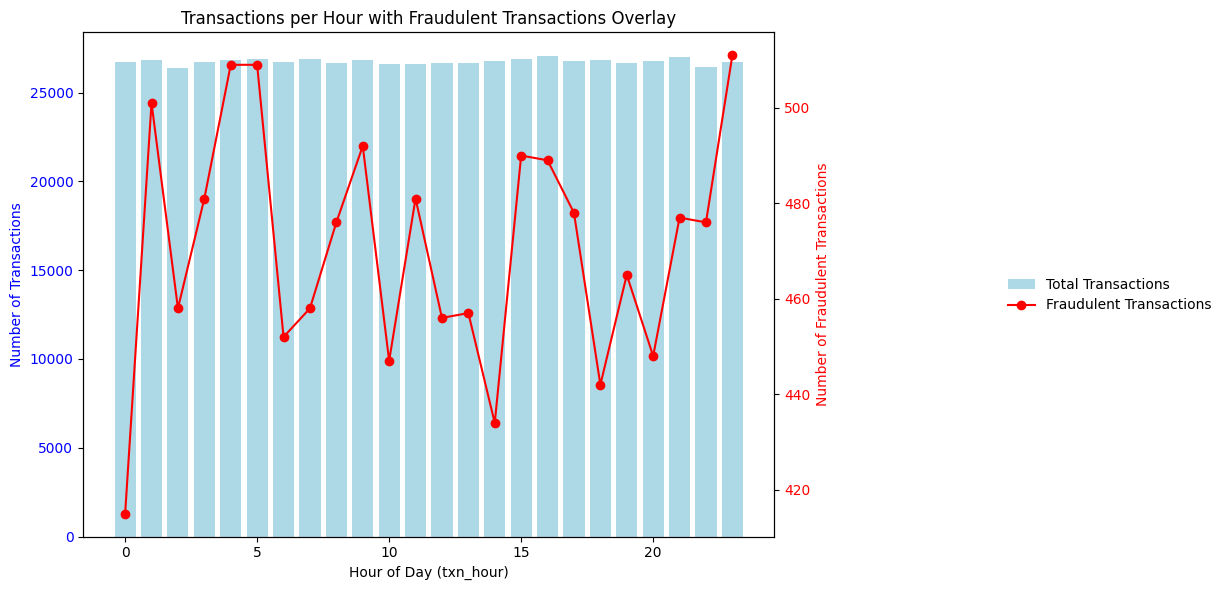

In [284]:
# Grouping data
total_txns_per_hour = sorted_df.groupby('txn_hour').size()
fraud_txns_per_hour = sorted_df[sorted_df['isFraud'] == 1].groupby('txn_hour').size()

# Align both series (fill missing hours with 0)
fraud_txns_per_hour = fraud_txns_per_hour.reindex(range(24), fill_value=0)
total_txns_per_hour = total_txns_per_hour.reindex(range(24), fill_value=0)

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for total transactions
ax1.bar(total_txns_per_hour.index, total_txns_per_hour.values,
        color='lightblue', label='Total Transactions')
ax1.set_xlabel('Hour of Day (txn_hour)')
ax1.set_ylabel('Number of Transactions', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Line plot for fraudulent transactions
ax2 = ax1.twinx()
ax2.plot(fraud_txns_per_hour.index, fraud_txns_per_hour.values,
         color='red', marker='o', label='Fraudulent Transactions')
ax2.set_ylabel('Number of Fraudulent Transactions', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and layout adjustment
plt.title('Transactions per Hour with Fraudulent Transactions Overlay')

# Get handles and labels from both axes
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

# Place legend outside the plot area
fig.legend(lines, labels, loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)

# Make room on the right for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space on the right

plt.show()
